First 5 rows of the dataset:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  

Number of samples in each class:
PRICE_BIN
Medium    243
Low       215
High       48
Name: count, dtype: int64

Checking for null values:
CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0


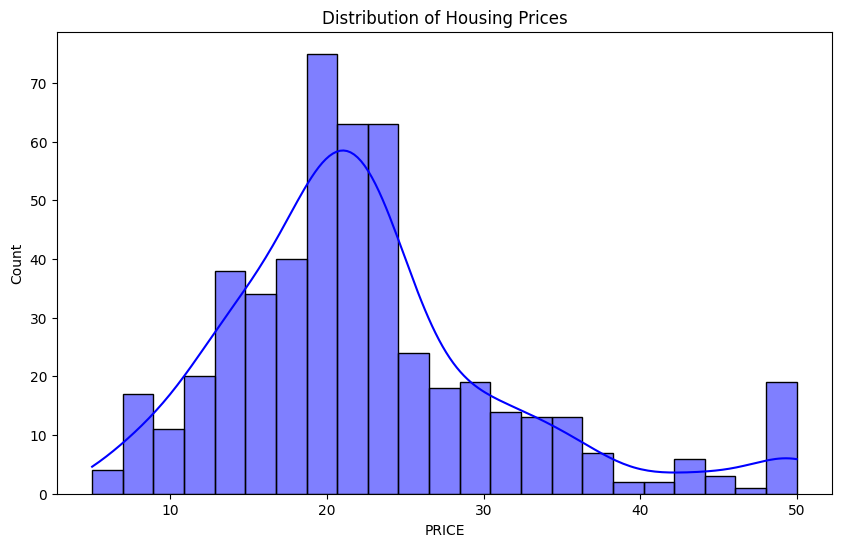

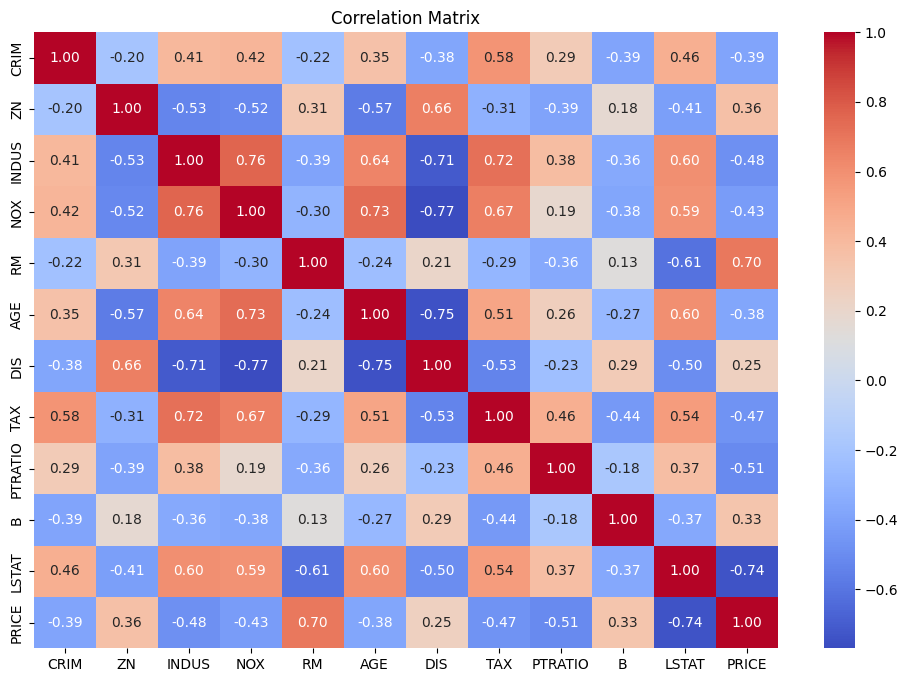


Covariance Matrix:
               CRIM           ZN       INDUS        NOX         RM  \
CRIM      73.986578   -40.215956   23.992339   0.419594  -1.325038   
ZN       -40.215956   543.936814  -85.412648  -1.396148   5.112513   
INDUS     23.992339   -85.412648   47.064442   0.607074  -1.887957   
NOX        0.419594    -1.396148    0.607074   0.013428  -0.024603   
RM        -1.325038     5.112513   -1.887957  -0.024603   0.493671   
AGE       85.405322  -373.901548  124.513903   2.385927  -4.751929   
DIS       -6.876722    32.629304  -10.228097  -0.187696   0.303663   
TAX      844.821538 -1236.453735  833.360290  13.046286 -34.583448   
PTRATIO    5.399331   -19.776571    5.692104   0.047397  -0.540763   
B       -302.381816   373.721402 -223.579756  -4.020570   8.215006   
LSTAT     27.986168   -68.783037   29.580270   0.488946  -3.079741   
PRICE    -30.718508    77.315176  -30.520823  -0.455412   4.493446   

                 AGE         DIS           TAX     PTRATIO           

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml

# Step 1: Import dataset from OpenML
boston = fetch_openml(name='Boston', version=1, as_frame=True)
boston_df = boston.frame

# Add target column 'PRICE'
boston_df.rename(columns={'MEDV': 'PRICE'}, inplace=True)

# Step 2: Display first 5 rows
print("First 5 rows of the dataset:")
print(boston_df.head())

# Step 3: Check the number of samples of each class (Here 'PRICE' is continuous, so we bin it)
boston_df['PRICE_BIN'] = pd.cut(boston_df['PRICE'], bins=3, labels=['Low', 'Medium', 'High'])
print("\nNumber of samples in each class:")
print(boston_df['PRICE_BIN'].value_counts())

# Step 4: Check for null values
print("\nChecking for null values:")
print(boston_df.isnull().sum())

# Step 5: Visualize data
def visualize_data(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['PRICE'], kde=True, color='blue')
    plt.title('Distribution of Housing Prices')
    plt.show()

    # Select only numeric columns for correlation matrix
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()


visualize_data(boston_df)

# Step 6: Obtain covariance and correlation values
numeric_df = boston_df.select_dtypes(include=[np.number])  # Select numeric columns only

print("\nCovariance Matrix:")
print(numeric_df.cov())

print("\nCorrelation Matrix:")
print(numeric_df.corr())


# Step 7: Train and test the model
# Ensure all columns are numeric
X = boston_df.drop(['PRICE', 'PRICE_BIN'], axis=1)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical columns to dummy variables if any
y = boston_df['PRICE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 8: Apply regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting on test data
y_pred = lr.predict(X_test)

# Step 9: Predict the accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
